                   Final Project - Data Science Intro
                           Zohar Moore

# Exploratory Data Analysis of Mass Shootings in the USA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
sns.set()
%matplotlib inline
!pip install wordcloud
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# 1 The Dataset: US Mass Shootings

Between 1966 and 2017, 398 mass shooting attacks occurred in the USA, resulting in 1996 deaths and 2488 injuries. 


Data related to these attacks was collected into a CSV dataset called "Mass Shootings Dataset", and can be found on kaggle.com/zusmani/us-mass-shootings-last-50-years.

Many lone-actor mass shooters write about their plan in their social media platforms or in an "open-letter" prior to commiting the act. The FBI is known for scouting social media looking for possible types of threating behaviours, lone-shooters included, using machine learning algorithms and an assignated shooter profile for perventative measures. For a Data Science Course project, an exploratory data analysis will be conducted on the data in an attempt to characterize the mass shooter profile based only on the given dataset above. 

Questions to be answered for such a profile are as follows: 

* who is the prevalent shooter? Where is he from? what's features describe him (gender, race, age)? 
* does he have a mental illness as a possible cause of his behaviour? 
* What is the proportion of shooters with mental health issues? 
* What are the main causes for the occurrences of such incidents? 

## A Glance at the Data...

In [2]:
df = pd.read_csv(r"C:/python_class/mass_shooting_final_project/Mass Shootings Dataset Ver 5.csv", encoding = "utf-8")
df.head() 

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [3]:
df.shape

(323, 21)

In [4]:
df.columns.values

array(['S#', 'Title', 'Location', 'Date', 'Incident Area',
       'Open/Close Location', 'Target', 'Cause', 'Summary', 'Fatalities',
       'Injured', 'Total victims', 'Policeman Killed', 'Age',
       'Employeed (Y/N)', 'Employed at', 'Mental Health Issues', 'Race',
       'Gender', 'Latitude', 'Longitude'], dtype=object)

Each row describes a mass-shooting incident. The data holds 323 incidents. 
Each incident is detailed by 21 decriptive, categorical and numeric variables (columns) as follows:

* S# - serial number. (Dropped).
* Date of the incident.                 
* Title - The descriptive title that is identified with the incident.
* Summary of the incident.
* Incident Area - where the incident took place.
* Location - city, state of the incident.
* Open/Close Location - Inside a building or open space.(Dropped).
* Fatalities - no. of deaths.
* Injured - no. of injured.
* Total victims - sum of Fatalities and Injured. 
* Policeman Killed - no. of policemen killed (on duty) in the incident. (Dropped).
* Latitude and Longitude coordinates for a precise location. 

As well as details about the shooter which we are looking for to build the shooter's profile: 

* Age, race, and gender of the shooter.	
* Mental Health Issues - Yes, no, unclear, unknown. --> Target variable.  
* Employeed - was the shooter employed coming up the incident? (Y/N). (Dropped).
* Employed at - Employer/company name (descriptive). (Dropped).
* Target - possible target.
* Cause - Terrorism, Hate Crime, Fun, unknown etc.

Target variable is setwhether shooters suffer from mental health issues, and show the other variables to enrich the EDA. 

In hypothesising that most incidents are a result of insanity, let's see what proportion of mass-shooters do suffer from mental health issues. Socioeconomic status can be understood better using the "employed" and "employed at" columns, considering whether economic stress play a factor coming up the incident. (For example, did most shooters have no job and act out of despairity and the feeling that they have nothing, and therefore, nothing to lose?).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S#                    323 non-null    int64  
 1   Title                 323 non-null    object 
 2   Location              278 non-null    object 
 3   Date                  323 non-null    object 
 4   Incident Area         261 non-null    object 
 5   Open/Close Location   295 non-null    object 
 6   Target                318 non-null    object 
 7   Cause                 246 non-null    object 
 8   Summary               323 non-null    object 
 9   Fatalities            323 non-null    int64  
 10  Injured               323 non-null    int64  
 11  Total victims         323 non-null    int64  
 12  Policeman Killed      317 non-null    float64
 13  Age                   179 non-null    object 
 14  Employeed (Y/N)       67 non-null     float64
 15  Employed at           4

## 2 Exceptions in the Data

"Age" datatype was an object and was changed to float. 

Also, for convenience purposes in this project, incidents that were commited by two shooters were modified in "Age" variable to the age of the first shooter. (in most instances, such incidents has similarly aged shooters so this should be fine). 

In [6]:
df.iloc[249,13]

'17,18'

In [7]:
df.Age = df.Age.str.split(",").str[0].astype(float)
df.iloc[249,13]

17.0

Irrelevant variables were removed:

* Serial number. 
* Although interesting to determine causality of socioeconomic conditions (i.e., whether the shooters were employeed prior to the incident), "Employed At" and "Employed" have too much missing data and were removed to avoid threats over the validity of any conclusions. 
* "Policeman killed" is irrelevant to the research question here. Knowing the number of policemen killed will be a great perventative method to measure how threating a shooter is based on certain features, but is irrelevant here. 
* Whether the incident's location was an open or close space and its latitude and longitude is irrelevant for this analysis too.

In [8]:
df.drop(["S#", "Employed at", "Employeed (Y/N)", "Policeman Killed", "Open/Close Location", "Latitude", "Longitude"], axis=1, inplace=True)

Case sensitivity differences were fixed and categories for races and genders were generalized:

In [9]:
df['Race'] = df['Race'].str.lower() 
df['Race'] = df['Race'].replace("some other race", "other")
df['Race'] = df['Race'].replace(["white american or european american", "white american or european american/some other race"], "white")
df['Race'] = df['Race'].replace(["black american or african american", "black american or african american/unknown"], "black")
df['Race'] = df['Race'].replace(["asian american/some other race", "asian american"], "asian")
print(df['Race'].value_counts())

white                               144
black                                85
unknown                              42
other                                22
asian                                18
latino                                5
native american or alaska native      3
two or more races                     2
Name: Race, dtype: int64


In [10]:
df['Gender'] = df['Gender'].replace("M", "Male")
df['Gender'] = df['Gender'].replace("F", "Female")
df['Gender'] = df['Gender'].replace(["M/F", "Male/Female"], "Unknown")
print(df["Gender"].value_counts())

Male       292
Unknown     26
Female       5
Name: Gender, dtype: int64


In [14]:
df['Mental Health Issues'] = df['Mental Health Issues'].str.lower() 
df['Target'] = df['Target'].str.lower() 

In [12]:
print(df['Cause'].value_counts()) 

psycho                  68
terrorism               65
anger                   44
frustration             18
domestic dispute        12
unemployement           10
revenge                 10
racism                   6
unknown                  4
failing exams            3
religious radicalism     1
robbery                  1
domestic disputer        1
suspension               1
drunk                    1
breakup                  1
Name: Cause, dtype: int64


In [15]:
print(df['Target'].value_counts().head())

random               140
family                37
coworkers             22
students              16
students+teachers     14
Name: Target, dtype: int64


In [16]:
print(df['Incident Area'].value_counts().head())
df.rename(columns={'Incident Area': 'Incident_Area'}, inplace=True) # column name was modified to prevent issues. 

Home           43
Workplace       8
Home+School     7
Church          5
street          4
Name: Incident Area, dtype: int64


In [17]:
print(df['Location'].value_counts().head()) 

Seattle, Washington    5
Phoenix, Arizona       4
Killeen, Texas         4
Chicago, Illinois      3
Omaha, Nebraska        3
Name: Location, dtype: int64


In [29]:
df["Total Victims"] = df["Fatalities"]+df["Injured"]
df.rename(columns={'Total Victims': 'Total_Victims'}, inplace=True)

In [18]:
df.isnull().sum() 

Title                     0
Location                 45
Date                      0
Incident_Area            62
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Age                     144
Mental Health Issues      0
Race                      2
Gender                    0
dtype: int64

There's missing data in the following variables: 
* location 
* incident area
* target
* cause
* age
* race

Missing values in numeric variables were replaced with the columns' averages, and in categorical variables to the most prevalent value. 

In [20]:
df["Age_Available"] = ~df["Age"].isna() # for documentation purposes
Realagepr = df['Age'].value_counts(normalize=True)*100 #for documentation
df.Age.fillna(df.Age.mean(), inplace=True)
df["Race_Available"] = ~df["Race"].isna()
Realracepr = df['Race'].value_counts(normalize=True)*100 #for documentation
df.Race.fillna("white" , inplace=True) # most prevalent: white
df["Gender_Available"] = ~df["Gender"].isna()
Realgenderpr = df['Gender'].value_counts(normalize=True)*100 #for documentation
df.Gender.fillna("Male" , inplace=True) # most prevalent : male
Realtargetpr = df['Target'].value_counts(normalize=True)*100 #for documentation
df.Target.fillna("random" , inplace=True) # """""" random
Realcausepr = df['Cause'].value_counts(normalize=True)*100 #for documentation
df.Cause.fillna("psycho" , inplace=True) # """""" psycho
Realincarea = df['Incident_Area'].value_counts(normalize=True)*100 #for documentation
df.Incident_Area.fillna("Home", inplace=True)
Reallocationpr = df['Location'].value_counts(normalize=True)*100 #for documentation
df.Location.fillna("Seattle, Washington", inplace=True)

In [21]:
df.isnull().sum() 

Title                   0
Location                0
Date                    0
Incident_Area           0
Target                  0
Cause                   0
Summary                 0
Fatalities              0
Injured                 0
Total victims           0
Age                     0
Mental Health Issues    0
Race                    0
Gender                  0
Age_Available           0
Race_Available          0
Gender_Available        0
dtype: int64

Check for duplicates: 

In [25]:
duplicate = df[df.duplicated(['Location', 'Date'])]
duplicate

,Title,Location,Date,Incident_Area,Target,Cause,Summary,Fatalities,Injured,Total victims,Age,Mental Health Issues,Race,Gender,Age_Available,Race_Available,Gender_Available
19,Texas family murder-suicide,"Seattle, Washington",4/19/2016,Home,family,domestic dispute,Man killed his wife and two young children bef...,4,0,4,31.687151,unknown,white,Male,True,True,True
20,Alabama highway random shooting,"Seattle, Washington",4/19/2016,along a highway,random,psycho,Shooter fired from his car at two different lo...,1,4,4,31.687151,yes,white,Male,True,True,True
23,"Memphis, TN gas station shooting","Seattle, Washington",4/9/2016,at gas station,random,anger,Four people were shot below the waist at a gas...,0,4,4,31.687151,unknown,unknown,Unknown,True,True,True
38,Detroit Drive-by,"Seattle, Washington",3/11/2016,Home,random,psycho,Four men were sitting on a porch when a black ...,2,2,4,31.687151,unknown,unknown,Unknown,True,True,True
43,Kansas City Home Invasion,"Seattle, Washington",3/7/2016,Home,neighbors,psycho,Shooter killed four people at his next door ne...,4,0,4,31.687151,unknown,other,Male,True,True,True
48,Riverside restaurant shooting,"Seattle, Washington",2/28/2016,restaurant parking,random,psycho,Shooter fired upon group of people in a restau...,1,3,4,31.687151,unknown,other,Male,True,True,True
52,"Hesston, Kansas","Hesston, Kansas",2/25/2016,Home,random,psycho,"On Friday, 90 minutes after receiving a court ...",4,14,17,31.687151,unknown,black,Male,True,True,True
56,Houston Drive-by,"Seattle, Washington",2/21/2016,Home,random,psycho,Group of people was fired upon by an unknown n...,0,5,5,31.687151,unknown,unknown,Unknown,True,True,True
60,Kalamazoo Uber Driver Spree Killing,"Seattle, Washington",2/20/2016,Home,random,psycho,An Uber driver fired upon people in three loca...,6,2,8,31.687151,no,white,Male,True,True,True
66,"Los Angeles, CA street shooting","Seattle, Washington",2/6/2016,Home,random,psycho,Police were called to a street to investigate ...,1,3,4,31.687151,unknown,unknown,Unknown,True,True,True


As seen above, location-based duplicates aren't the same cases. 
Looking in Kaggle, the author also mentions that Ver 5 is cleaned of duplicates. 
Had there been any, they would have been deleted using DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)

# 3 Statistics & Data Distribution:

In [30]:
df.describe()

,Fatalities,Injured,Total victims,Age,Total_Victims
count,323.000000,323.000000,323.000000,323.000000,323.000000
mean,4.436533,6.176471,10.263158,31.687151,10.613003
std,5.783208,29.889182,33.662309,9.825572,33.711446
min,0.000000,0.000000,3.000000,0.000000,1.000000
25%,1.000000,1.000000,4.000000,28.000000,4.000000
50%,3.000000,3.000000,5.000000,31.687151,5.000000
75%,5.500000,5.000000,9.000000,34.000000,9.000000
max,59.000000,527.000000,585.000000,70.000000,586.000000


Mean number of fatalities in this dataset are approximately 4 - 5 people, injured 6. Fatalities rates lie between 0 to 59 people, and injuries between 0-527. 

Although dropped, it's interesting to mention that in most incidents no policemen was killed (0.13), and employeed shooters coming up the event were more prevalent (As mentioned, 256 values are missing from this column out of 323, and this dataset is only a small portion of actual incidents).

# 4 EDA

Let's answer the following questions:
    1. What are the age, race, gender and location distributions of mass-shooters? 
    2. What is the portion of mentally ill shooters?
    
These questions can help us not only understand better the actions of the shooters but also search for related keywords on the potential threat's social media posts:

    3. Who are the main targets that shooters picked?
    4. What are the main causes for the decision to commit the crime?

## 4.1 Age

In [31]:
Age_pr = df['Age'].value_counts(normalize=True)*100

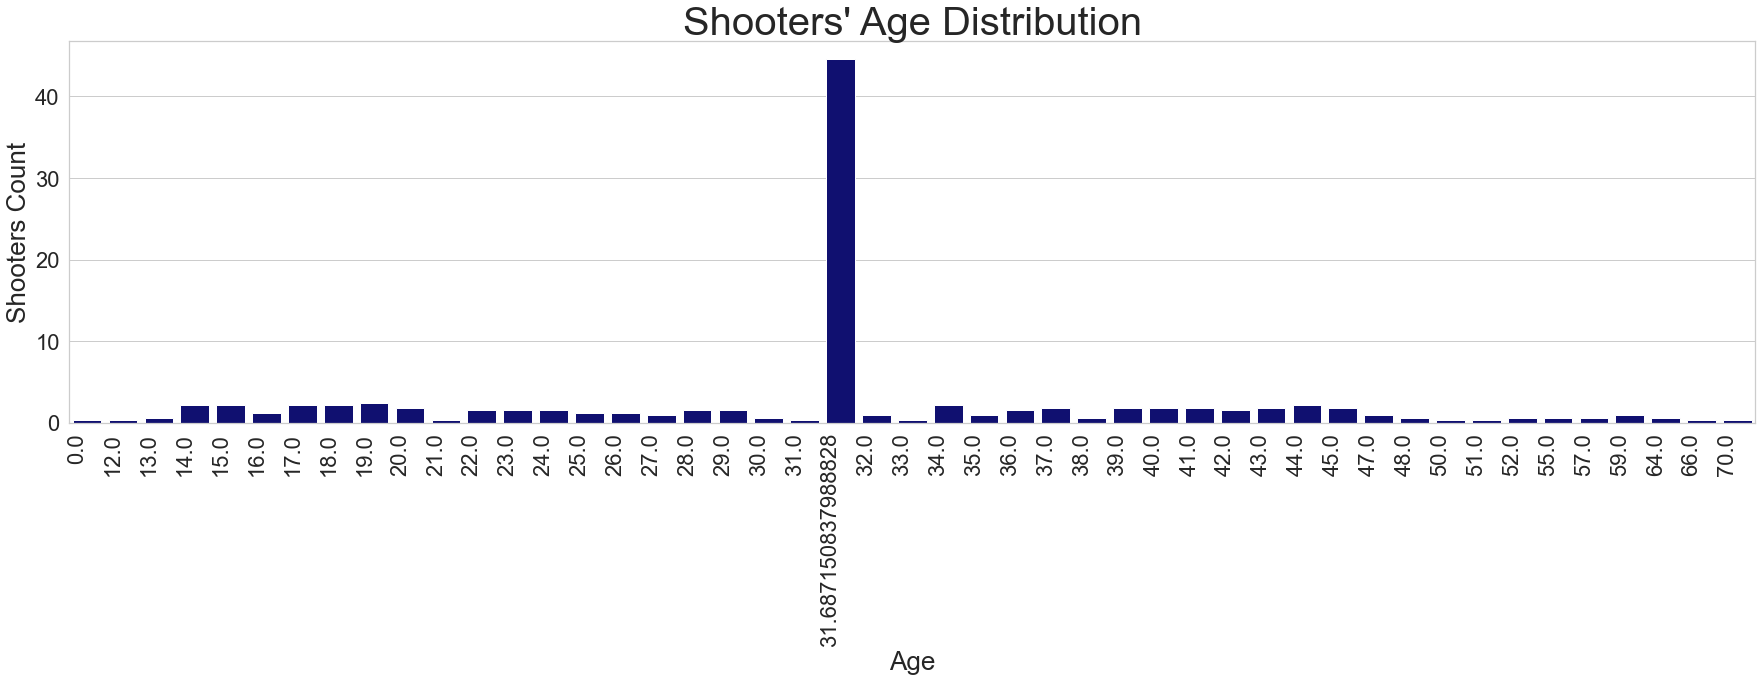

In [34]:
plt.figure(figsize=(25,10))
sns.set_style("whitegrid")
Age_barplot=sns.barplot(Age_pr.index, Age_pr.values, color = "navy")
plt.title("Shooters' Age Distribution", fontsize=40)
plt.xlabel('Age', fontsize=26)
plt.ylabel('Shooters Count', fontsize=26)
sns.set(font_scale = 2)
Age_barplot.set_xticklabels(Age_barplot.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show() #notice the high 31 number because of average being assigned to na's.

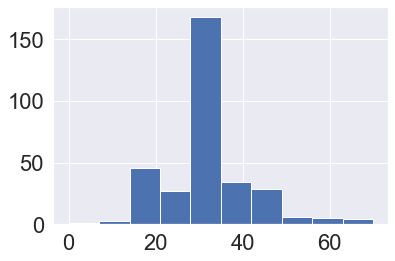

In [35]:
df.Age.hist(bins=10) # let's see it a little clearer

In [39]:
df["Age"].mean(skipna=True)

31.687150837988803

## 4.2 Race and Social Cohesion

Which is the most prevalent race in mass-shooting incidents in the US?

In [40]:
Race_pr = df['Race'].value_counts(normalize=True) * 100
Race_pr

white                               45.201238
black                               26.315789
unknown                             13.003096
other                                6.811146
asian                                5.572755
latino                               1.547988
native american or alaska native     0.928793
two or more races                    0.619195
Name: Race, dtype: float64

44% of the shooters in the data are white Americans. 
Prevalent assumptions about mass-shooters being immigrants can be refuted hypothetically. For example, asians and latinos (after being combined with possible native citizens and immigrants) take only 6% of the incidents. 
Prevalent assumptions about mass-shooters being black individuals, with the thought of them living in poor aras with high crime-rate or just based on racist stigmas, can be refuted hypothetically. That is because the other 13% of unknowns could be blacks, increasing the percentage to 39.5%, and decreasing the significance of the gap between white and black prevalence in the data. 

In [50]:
Race_dict = {Race_pr.index[i]: Race_pr.values[i] for i in range(len(Race_pr.index))} # create a dict to use for plot
Race_dict

{'white': 45.20123839009288,
 'black': 26.31578947368421,
 'unknown': 13.003095975232199,
 'other': 6.811145510835913,
 'asian': 5.572755417956656,
 'latino': 1.5479876160990713,
 'native american or alaska native': 0.9287925696594427,
 'two or more races': 0.6191950464396285}

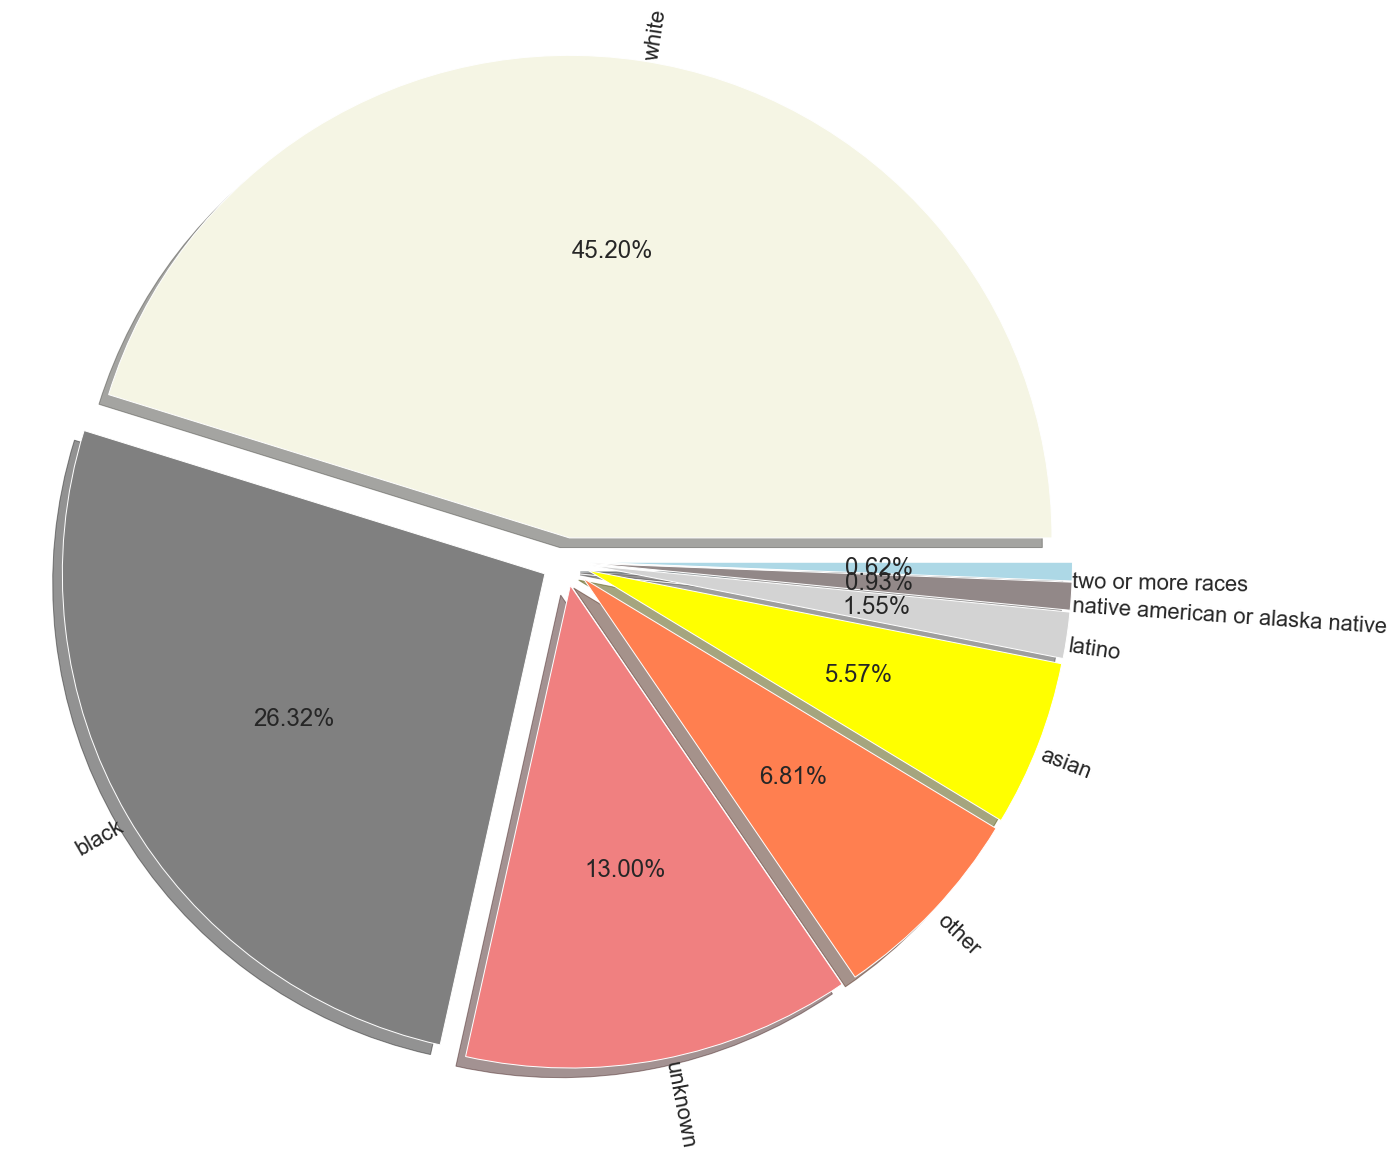

In [51]:
colors = ['#F5F5E4', "grey", 'lightcoral', 'coral', "yellow", "lightgrey", "#928888", "lightblue"]
plt.figure(figsize=(20,20))
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05)
plt.pie(Race_dict.values(), labels=Race_dict.keys(), colors=colors, explode=explode, autopct="%.2f%%", labeldistance = 1, rotatelabels=True, shadow=True)
plt.rcParams.update({'font.size': 20})
plt.axis('equal')
plt.show()

## 4.3 Gender

In [52]:
Gender_pr = df['Gender'].value_counts(normalize=True) * 100
Gender_pr

Male       90.402477
Unknown     8.049536
Female      1.547988
Name: Gender, dtype: float64

In [53]:
Gender_dict = {Gender_pr.index[i]: Gender_pr.values[i] for i in range(len(Gender_pr.index))}
Gender_dict

{'Male': 90.40247678018576,
 'Unknown': 8.04953560371517,
 'Female': 1.5479876160990713}

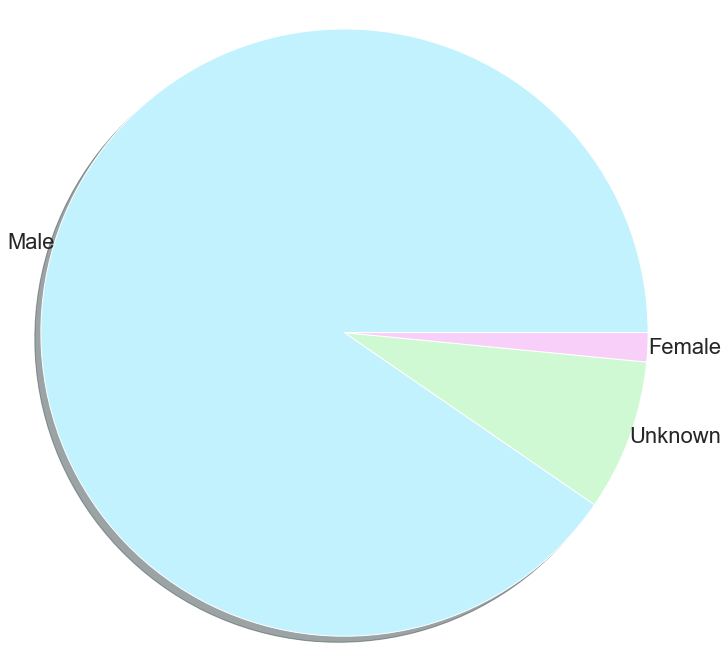

In [54]:
colors = ['#c2f2fd', '#cff9d2', "#f8cff9"]
plt.figure(figsize=(12,12))
plt.pie(Gender_dict.values(), labels=Gender_dict.keys(), colors=colors, labeldistance = 1, shadow=True)
plt.rcParams.update({'font.size': 20})
plt.axis('equal')
plt.show()

As seen from the pie charts above, shooters are mostly white men.

## 4.4 Geographic Distribution of Shooting Events

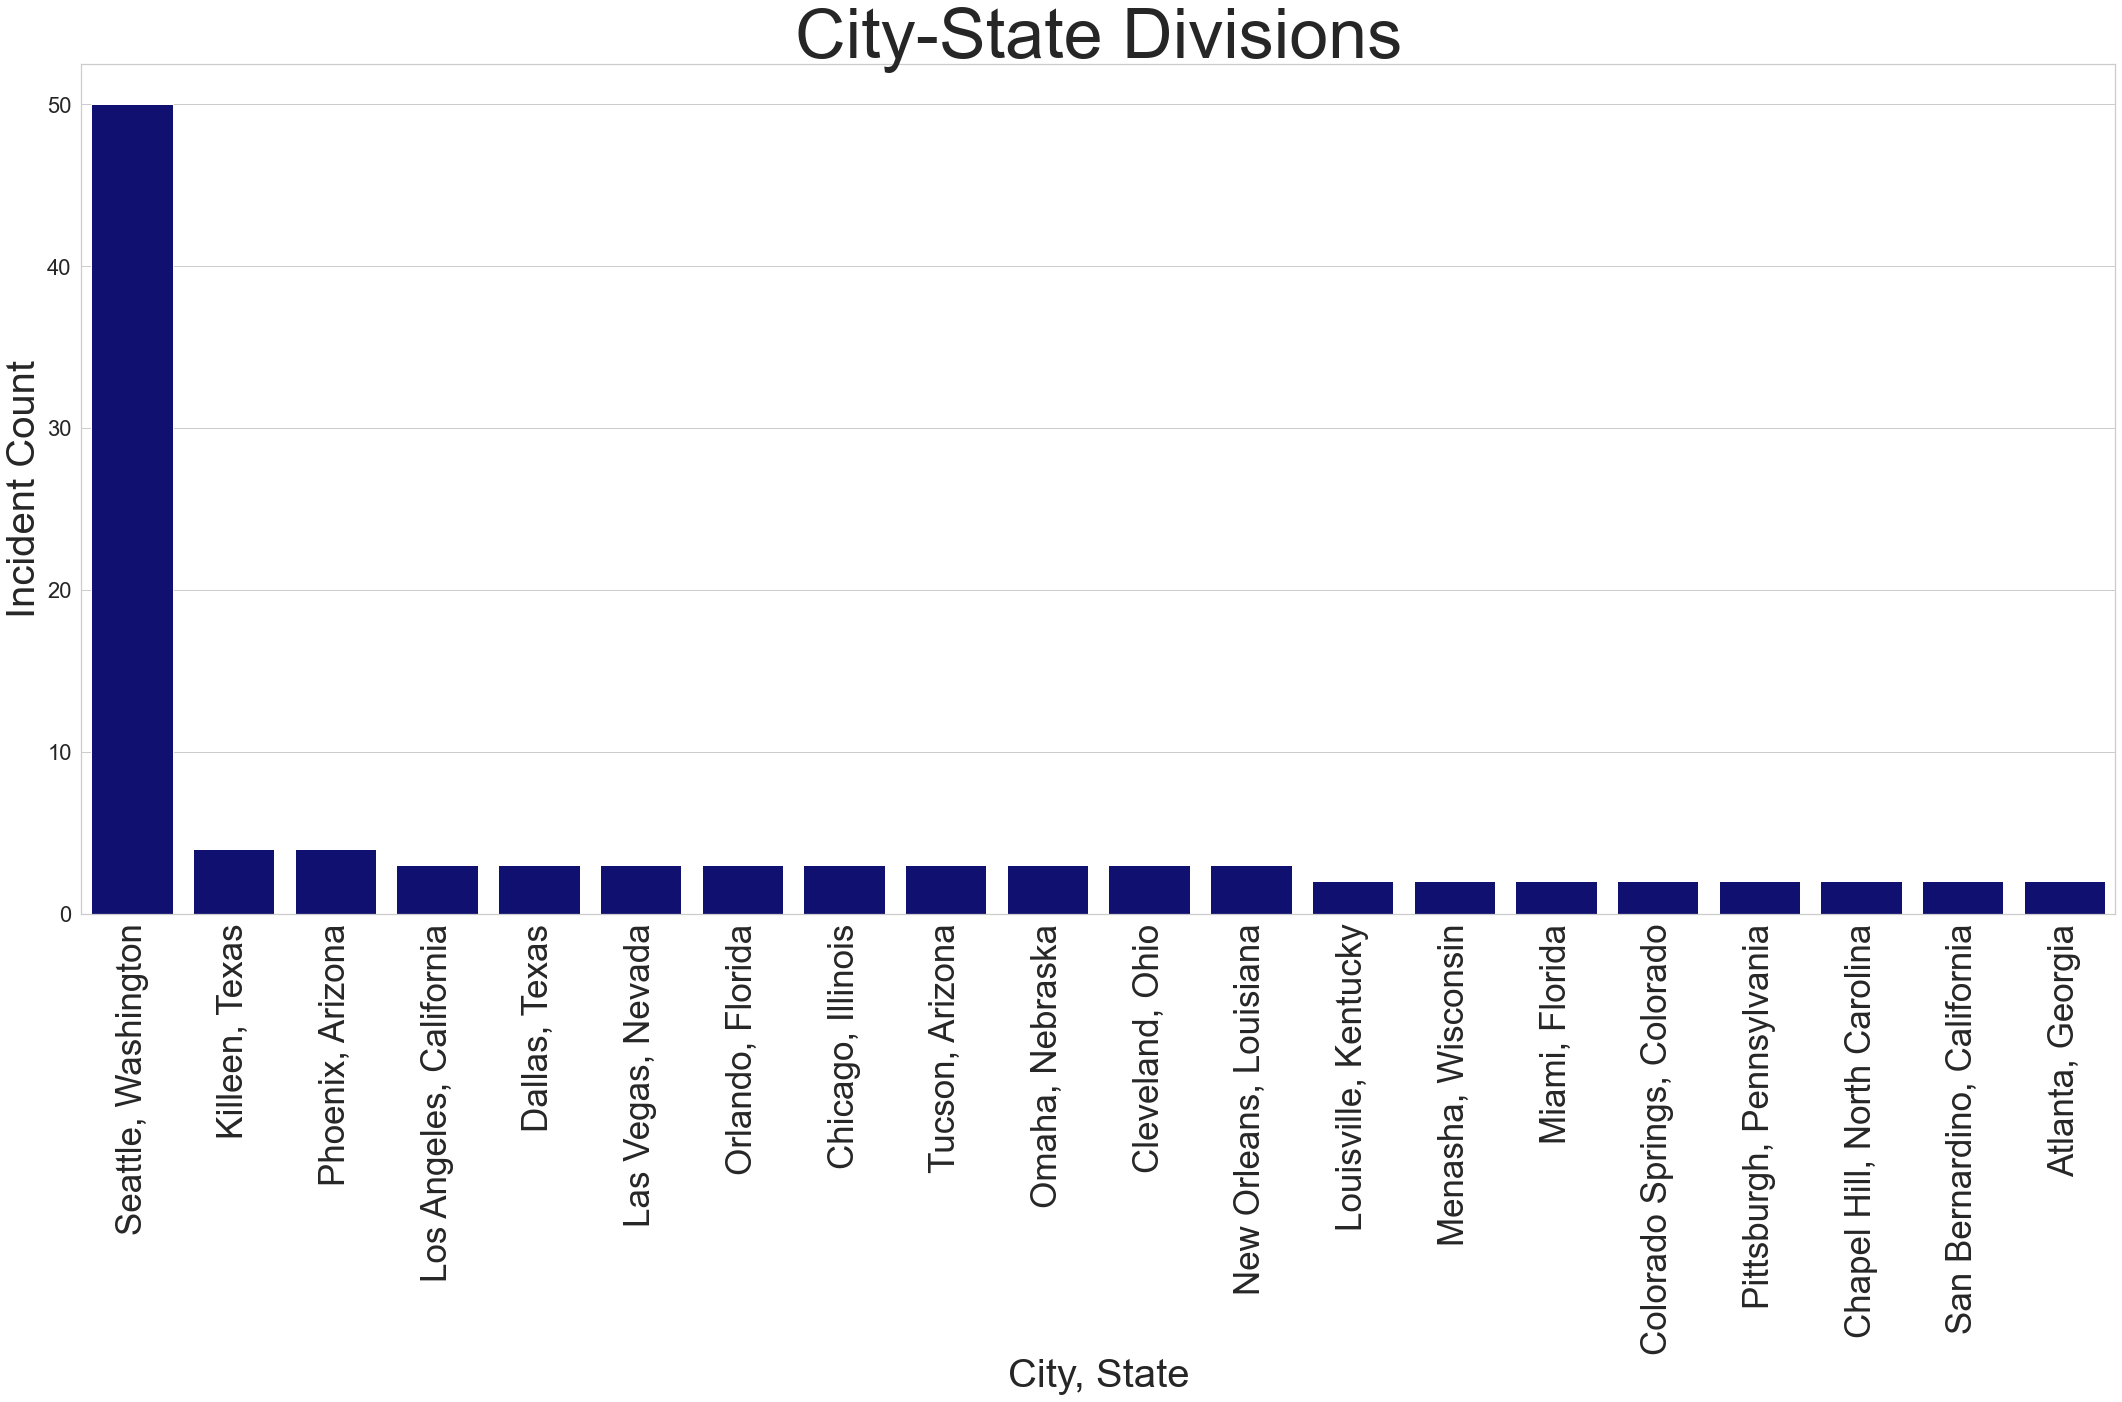

In [55]:
Location_pr = df['Location'].value_counts()
Location_pr = Location_pr.head(20) #as there are too many location to visualize over a plot, i'll be taking the top 20
plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
Location_barplot = sns.barplot(Location_pr.index, Location_pr.values, color = "navy")
plt.title('City-State Divisions', fontsize=70)
plt.xlabel('City, State', fontsize=40)
plt.ylabel('Incident Count', fontsize=40)
sns.set(font_scale = 2)
Location_barplot.set_xticklabels(Location_barplot.get_xticklabels(), rotation=90, size = 35)
plt.tight_layout()
plt.show()

Incidents are not equally-distributed across the US. 
If a social media post with a threat is found from these top 20 states, we should raise concern. 
notice huge gap is thanks to my way of dealing with missing data. 

## 4.5 Mental Health

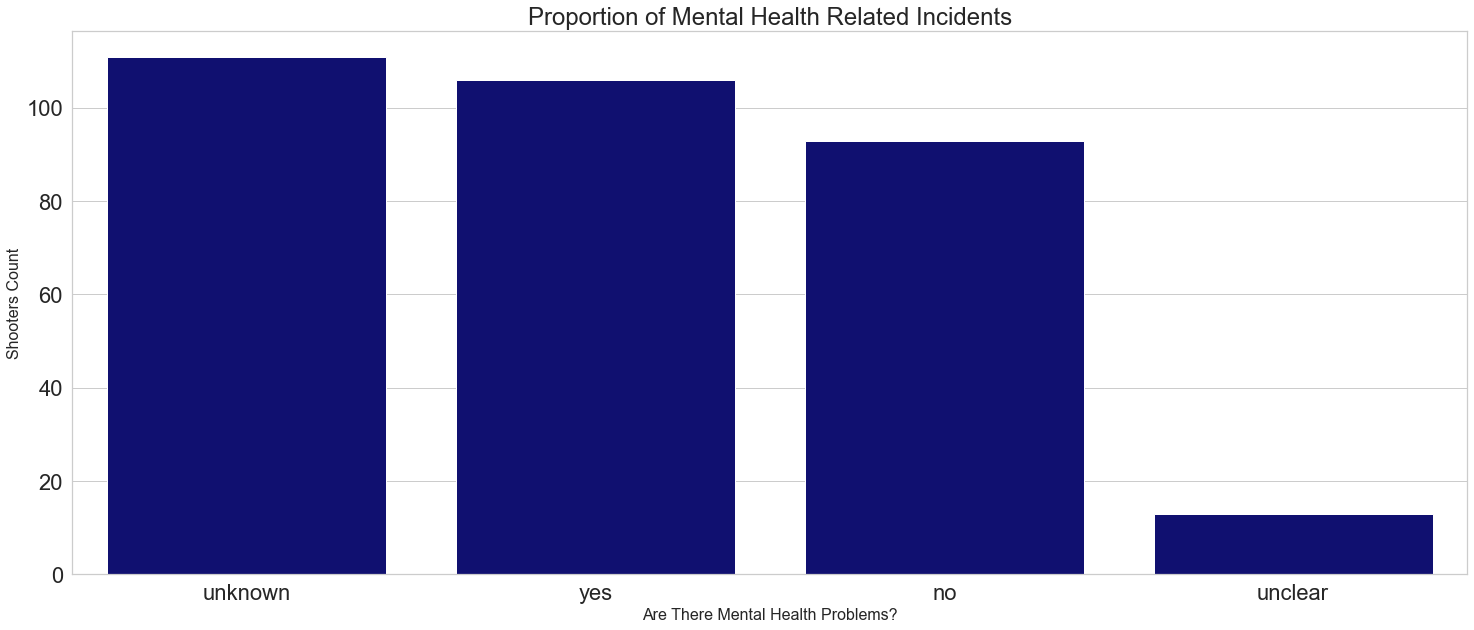

In [56]:
Insane_shooters_pr = df['Mental Health Issues'].value_counts()
plt.figure(figsize=(25,10))
sns.set_style("whitegrid")
sns.barplot(Insane_shooters_pr.index, Insane_shooters_pr.values, color = "navy")
plt.title('Proportion of Mental Health Related Incidents', fontsize=24)
plt.xlabel('Are There Mental Health Problems?', fontsize=16)
plt.ylabel('Shooters Count', fontsize=16)
plt.show()

Visualization shows that, among the incidents in which mental illness background is known, more shooters have a background of mental illness than those who don't. The gap is not large though, and is rather close to 50/50 (or thirds of the data as a whole). 

How many mental illness cases grouped by race and gender?

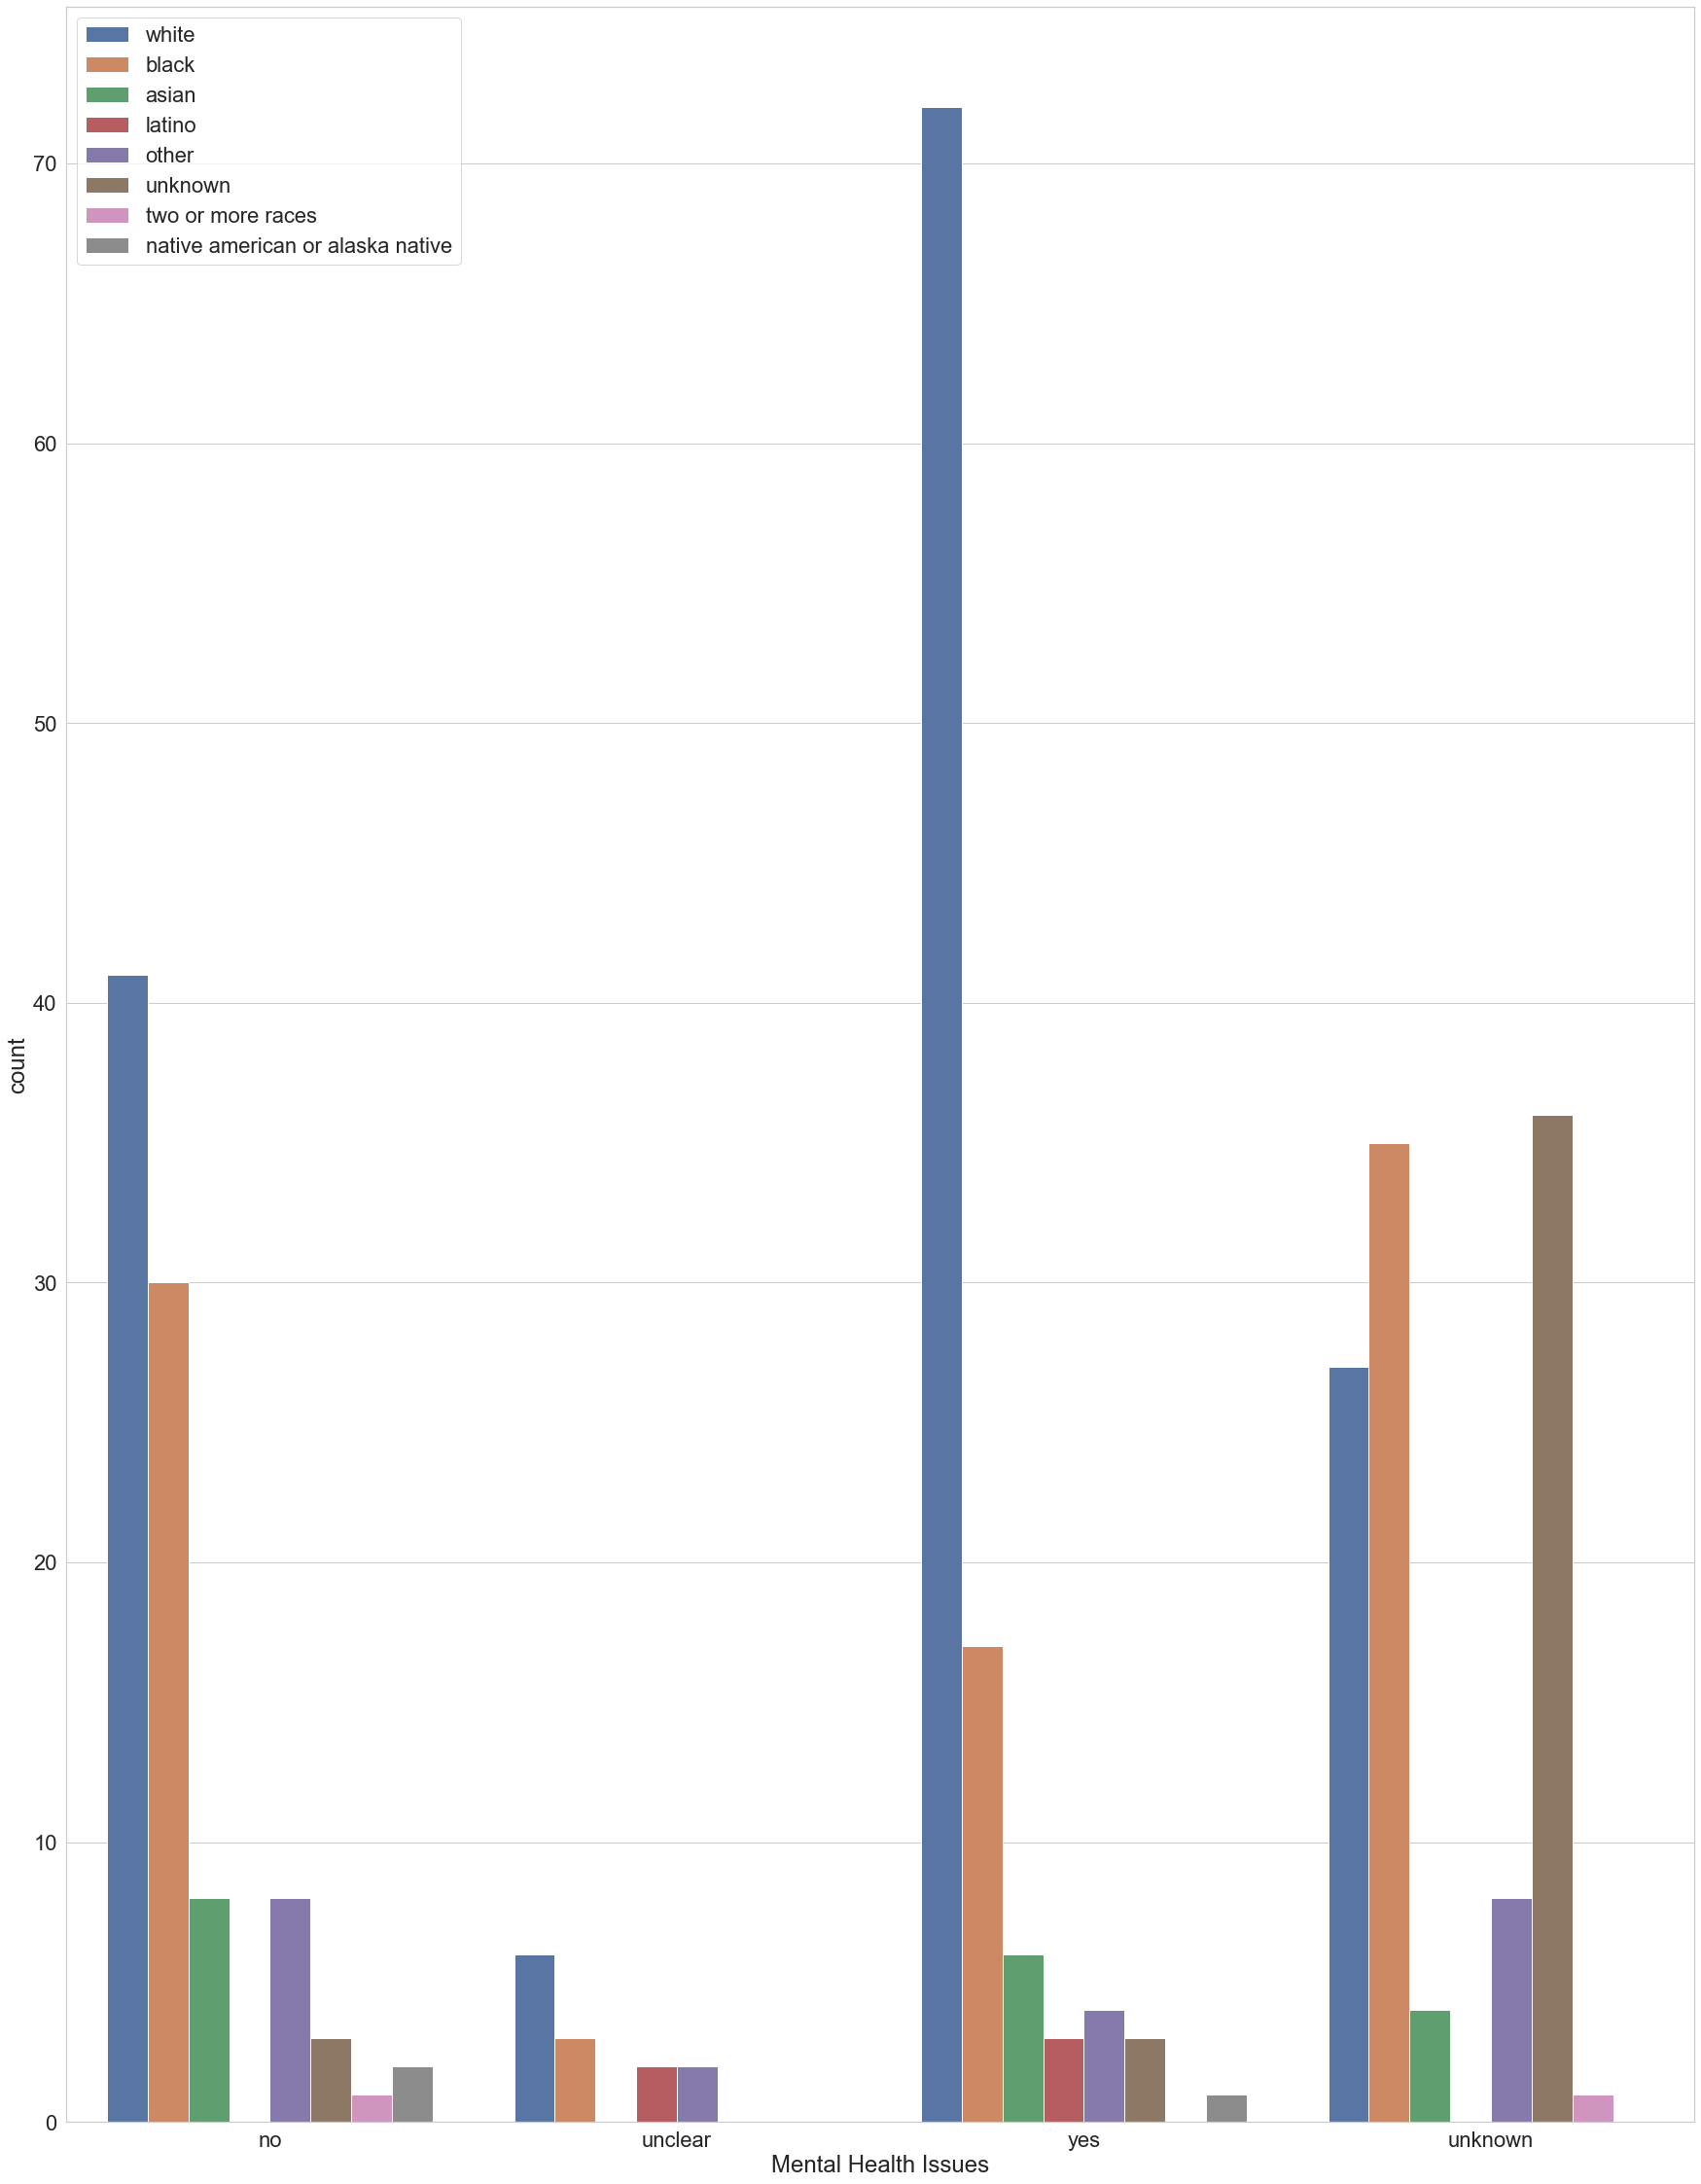

In [58]:
sns.countplot("Mental Health Issues", hue="Race", data=df)
plt.rcParams['figure.figsize'] = (30.0, 40.0)
plt.legend(loc='best') 
# please run cell twice for proper image 

In [ ]:
We can see that among white shooters, mental health issues were rather high. 

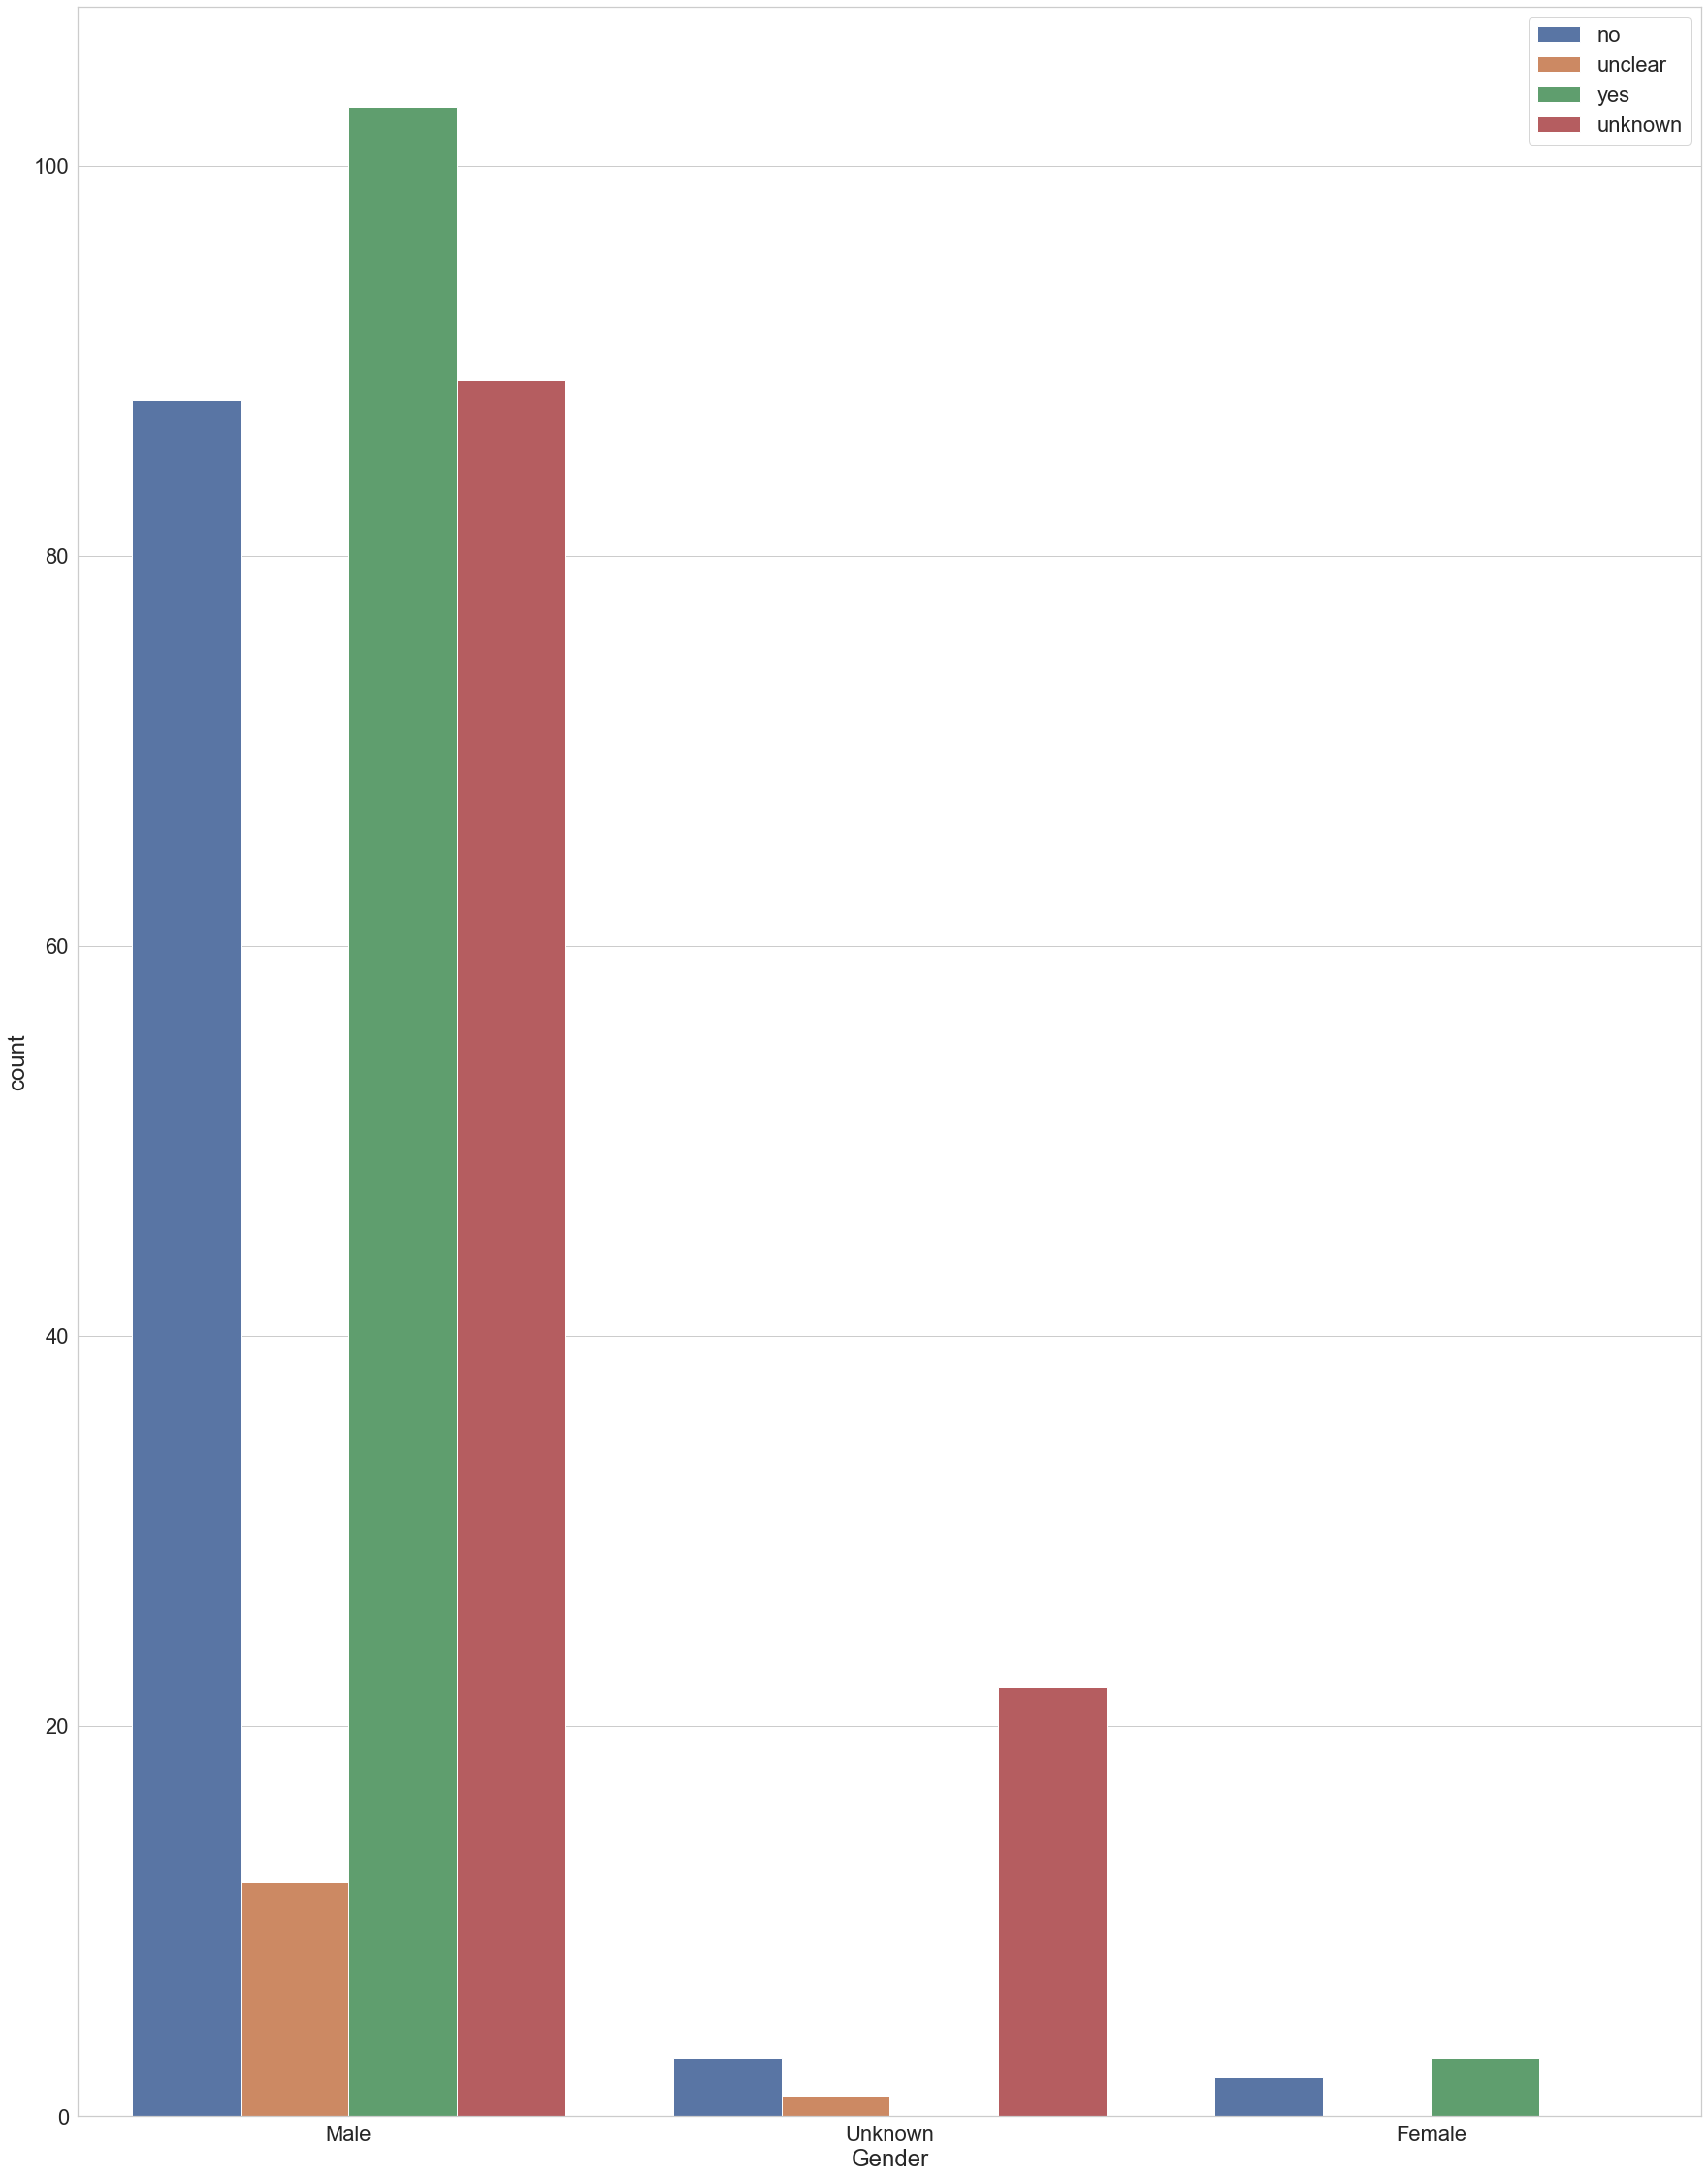

In [59]:
sns.countplot("Gender", hue="Mental Health Issues", data=df)
plt.rcParams['figure.figsize'] = (30.0, 40.0)
plt.legend(loc='upper right')

Mental health issues in the data exist mosly in incidents where shooters are males.

In [60]:
Target_pr = df.Target.value_counts()
Target_pr

random                       145
family                        37
coworkers                     22
students                      16
students+teachers             14
ex-coworkers                   9
party guests                   8
policeman                      7
ex-wife                        7
teachers                       5
ex-girlfriend                  4
neighbors                      4
ex-wife & family               3
police                         2
children                       2
friends                        2
school girls                   2
psychologist+psychiatrist      1
basketball players             1
students+parents               1
protestors                     1
policeman+council member       1
women                          1
club members                   1
partner's family               1
girlfriend                     1
marines                        1
rapper+random                  1
congresswoman                  1
social workers                 1
sikhs     

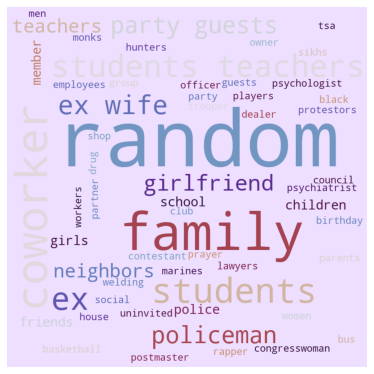

In [61]:
target_words = "" 
stopwords = set(STOPWORDS)

#split and rejoin words in Target to modify into lower cases
for val in df.Target:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() 
    target_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800, background_color="#EEDEFF", colormap="twilight_shifted_r", stopwords=stopwords).generate(target_words)

plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Main target of crimes in data were random people with no apparent reason.

In [62]:
Incident_Area_pr = df.Incident_Area.value_counts()
Incident_Area_pr

Home                                      105
Workplace                                   8
Home+School                                 7
Church                                      5
street                                      4
                                         ... 
New York Technical College in Brooklyn      1
Entrance of building                        1
Central Middle School                       1
Train                                       1
Fort Gibson Middle School                   1
Name: Incident_Area, Length: 175, dtype: int64

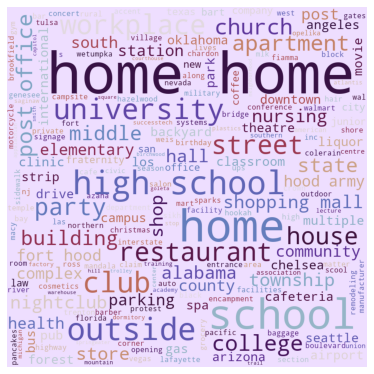

In [66]:
IncidentArea_words = "" 
stopwords = set(STOPWORDS)

for val in df.Incident_Area:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    IncidentArea_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, background_color="#EEDEFF", colormap="twilight_shifted_r", stopwords=stopwords).generate(IncidentArea_words)

plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

Incidents occurred mostly in schools, home, clubs and the streets. 

In [64]:
Cause_pr = df.Cause.value_counts()
Cause_pr

psycho                  145
terrorism                65
anger                    44
frustration              18
domestic dispute         12
unemployement            10
revenge                  10
racism                    6
unknown                   4
failing exams             3
religious radicalism      1
robbery                   1
domestic disputer         1
suspension                1
drunk                     1
breakup                   1
Name: Cause, dtype: int64

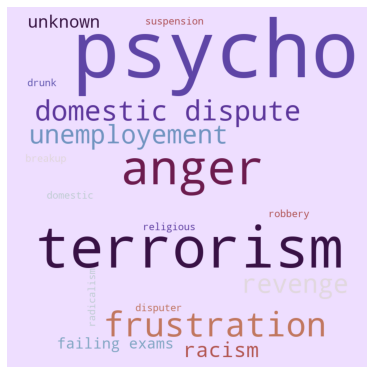

In [65]:
cause_words = "" 
stopwords = set(STOPWORDS)

for val in df.Cause:
    val=str(val)
    tokens=val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    cause_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, background_color="#EEDEFF", colormap="twilight_shifted_r", stopwords=stopwords).generate(cause_words)

plt.figure(figsize = (5,5), facecolor = None)
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

It should be noted that the Cause column might not be greatly accurate. 
As the sources used to compile data vary from Stanford to "other web sources", the accuracy of the data should be taken with a grain of salt. Having read about some of the incidents, I personally interpreted different causes for certain event. 

For example, the Columbne highschool Massacre was not terrorism in my opinion eventhough the murderers used self-made bombs. I believe it was more of a revenge. 

Moreover, "psycho" being the most prevalent word stands against our prior knowledge from analyzing the data and seeing that a background of mental illness was prevalend in roughly a third of the cases.

Lastly, it is complicated to minimize a possible cause into one word. 

With that being said, results show the main causes of shooting incidents are Psycho, terrorism and anger.
Main targets were random, family and co-workers. 
Most shooting incidents took place either at home, at work or at school.

The average age of the shooters is 31 years old.
Shooters were mostly white men. 

# 5 Feature Engineering

Let's add a column of just the year: 

In [72]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
incidents_per_year = df.Year.value_counts()
incidents_per_year

2016    69
2015    67
2013    16
2012    15
2014    14
2017    10
2007    10
1993     9
2009     8
1999     7
2006     7
1988     6
2008     6
1997     6
2011     6
1991     5
1998     5
1994     4
1992     4
1995     4
1986     3
1989     3
1984     3
1996     3
2003     3
2005     3
2010     2
2001     2
1974     2
1976     2
1979     2
1982     2
1983     2
1966     2
1985     2
2004     2
2002     2
1987     1
1990     1
1972     1
1971     1
2000     1
Name: Year, dtype: int64

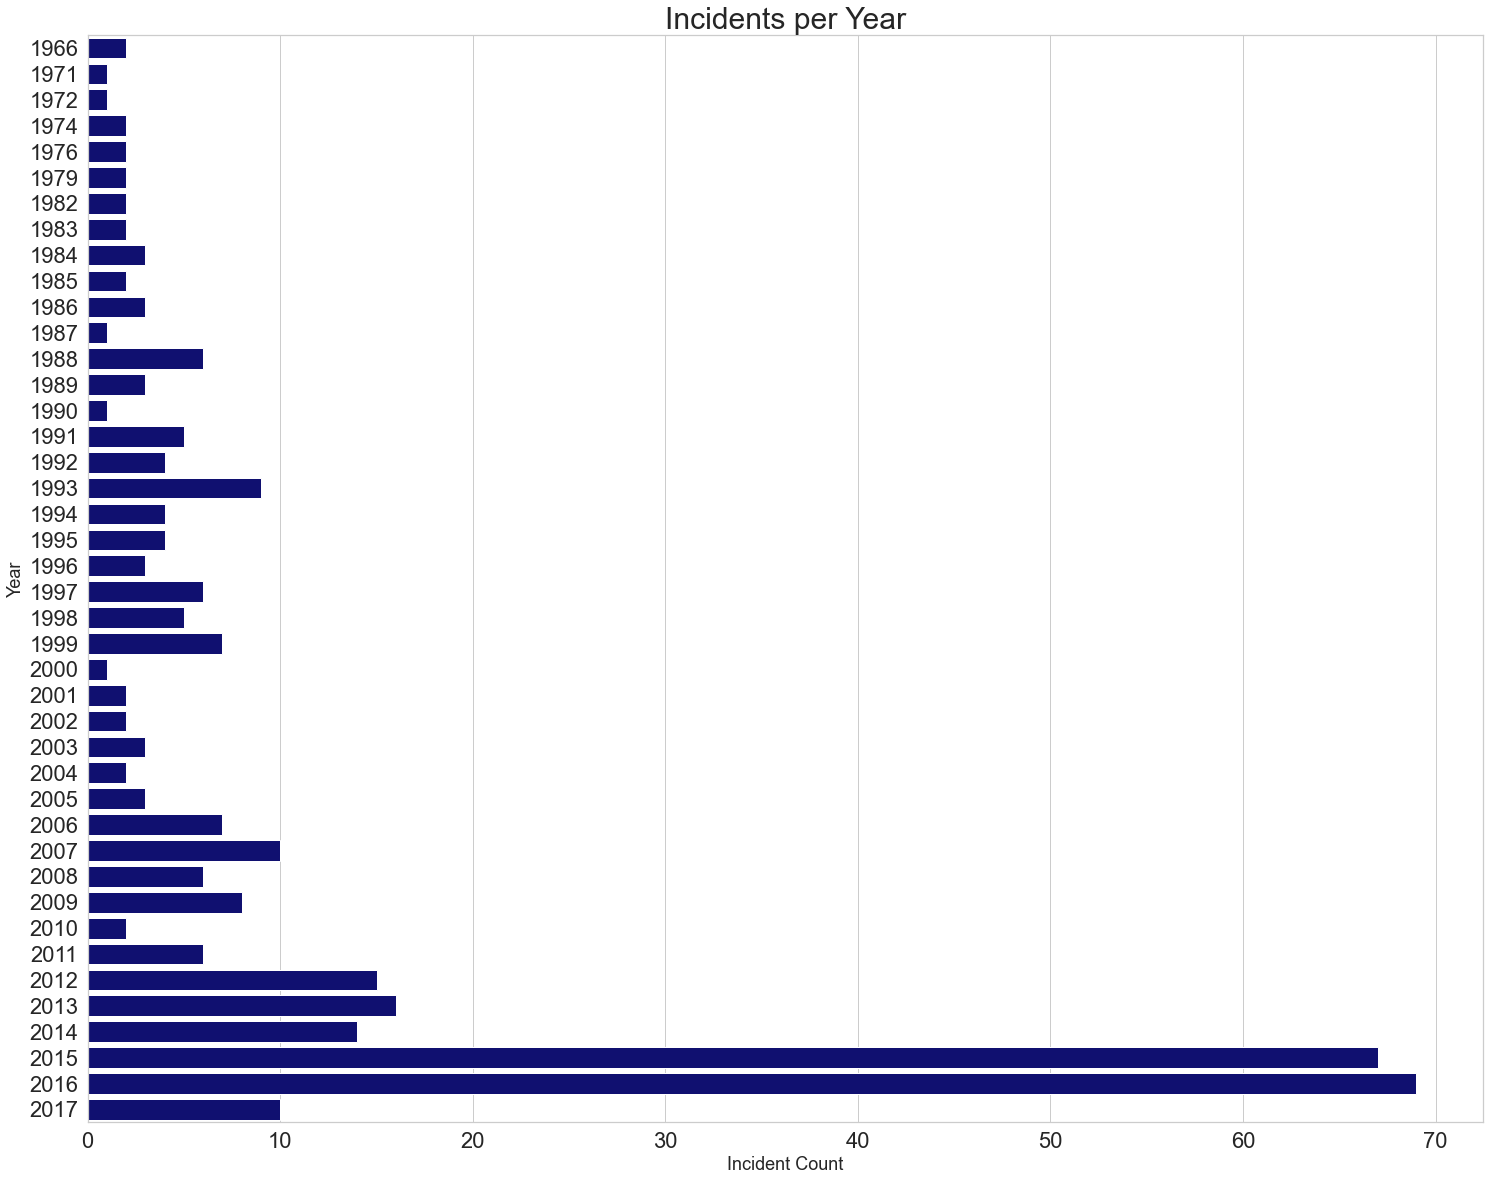

In [73]:
plt.figure(figsize=(25,20))
sns.set_style("whitegrid")
sns.barplot(incidents_per_year.values, incidents_per_year.index, orient="h", color = "navy")
plt.title("Incidents per Year", fontsize = 30)
plt.xlabel("Incident Count", fontsize = 18)
plt.ylabel("Year", fontsize = 18)
plt.show()

Looking at the barplot above, we can see most mass-shooting incidents in this data occured in 2015 and 2016.

This is important, it might be that external occurrences during these couple of years might have affected the personas who had chosen to commit murder based on contextual issues rather then their characteristics. 

In 2016 presidental elctions took place between Trump and Clinton. Moreover, in 2016 President Obama (before the elections) introduced executive orders to expand the enforcement of federal gun laws. It is reasonable to consider the elections as having an impact on the prevalence this year and the year before (2015), and the latter as a trigger for many people feeling like their rights had been taken away from them. 

It could be that holding guns are a great attribute to the amount of mass-shooters. There is an average of 88 firearms per 100 people in the United States, the highest in the world.

We can also generally see an upward trend. 

Another option for this gap is a copycat effect where frustrated individuals seek the media’s attention to get attention for their needs, or even to get a weird, twisted 15 minutes of fame. In 2016 in light of 3 major mass-shootings (that also account for the gap), media attention grew.

Let's add a column that separates ages to older and younger than 21. 
We can check for a trend related to the ability law-wise to hold guns.

In [74]:
df["Law_age"] = np.nan
df.loc[df.Age >= 21, "Law_age"] = "Aged"
df.loc[df.Age < 21, "Law_age"] = "Underaged"

In [75]:
Aged_pr = df['Law_age'].value_counts(normalize=True)*100
Aged_pr

Aged         84.520124
Underaged    15.479876
Name: Law_age, dtype: float64

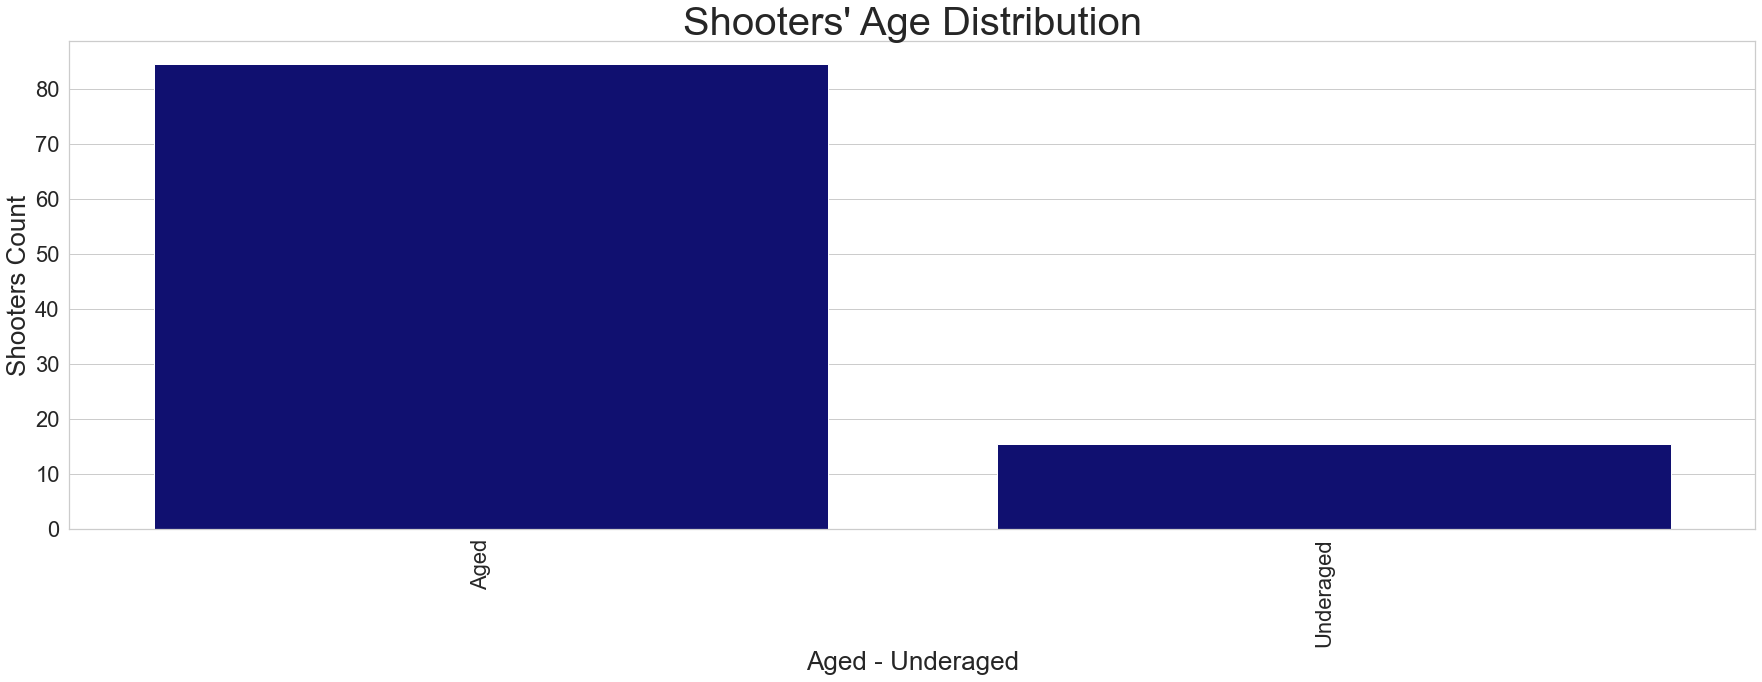

In [76]:
plt.figure(figsize=(25,10))
sns.set_style("whitegrid")
Aged_barplot=sns.barplot(Aged_pr.index, Aged_pr.values, color = "navy")
plt.title("Shooters' Age Distribution", fontsize=40)
plt.xlabel("Aged - Underaged", fontsize=26)
plt.ylabel('Shooters Count', fontsize=26)
sns.set(font_scale = 2)
Aged_barplot.set_xticklabels(Aged_barplot.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Aged shooters hold 72% of shooters. It's probable that the fact that weapons can be solf only when you are of age had an effect on these proportions.
When a post is posted on social media, one of the parapeters that should be taken into consideration is whether the user posting is of age. of course, children did access guns regardless of their age, and probably in some of the indicents in general, there was an illegal process of getting hold of the crime weapons beit guns. 
There are also other weapons that we didn't take into consideration in this project. maybe some of the aged/unaged didnt use a gun and so this isn't precise. 

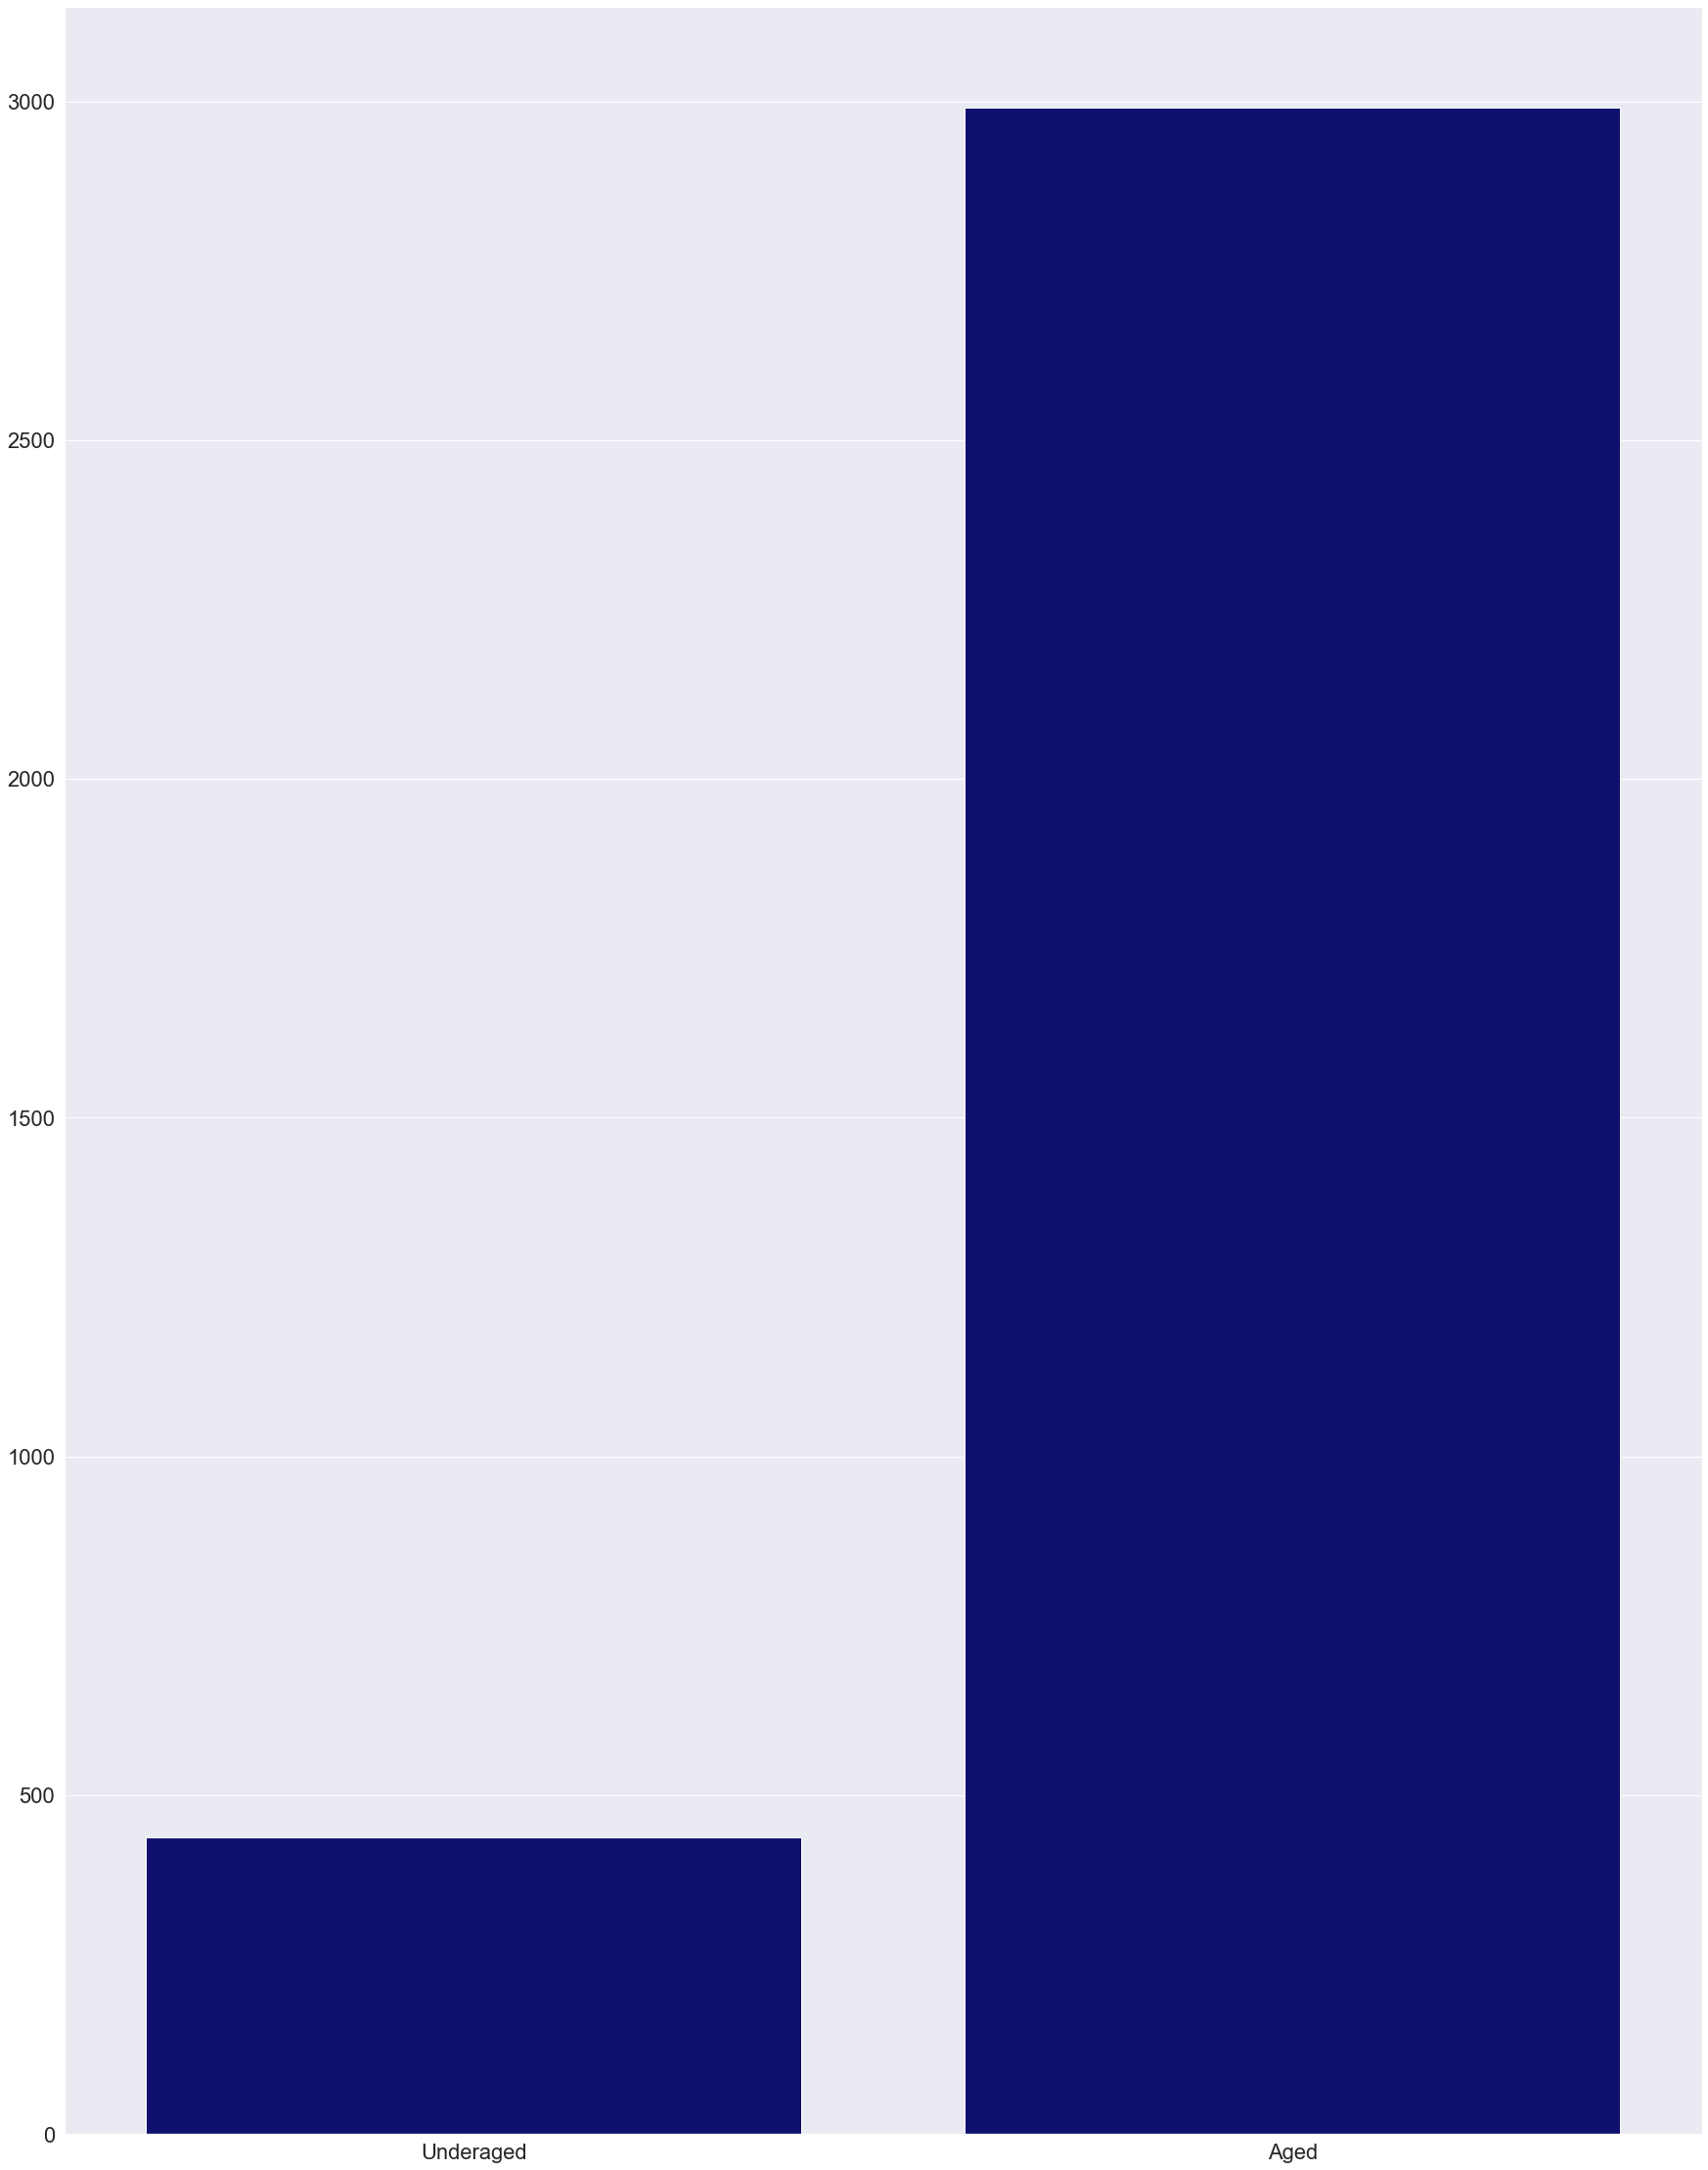

In [77]:
total_victims = [df.loc[df["Law_age"]== "Underaged","Total_Victims"].sum(),df.loc[df["Law_age"]== "Aged","Total_Victims"].sum()]
sns.barplot(x=["Underaged","Aged"], y = total_victims, color = "navy")

We can also see that aged mass-shooters accounted for a significanly larger amount of victims, either casualties or injuries. Underaged shooters tend to be less demagable. 

Bibliography:
    
https://scholarworks.waldenu.edu/cgi/viewcontent.cgi?article=1267&context=jsc
https://www.nytimes.com/2017/11/07/world/americas/mass-shootings-us-international.html
https://scholarworks.waldenu.edu/cgi/viewcontent.cgi?article=1267&context=jsc

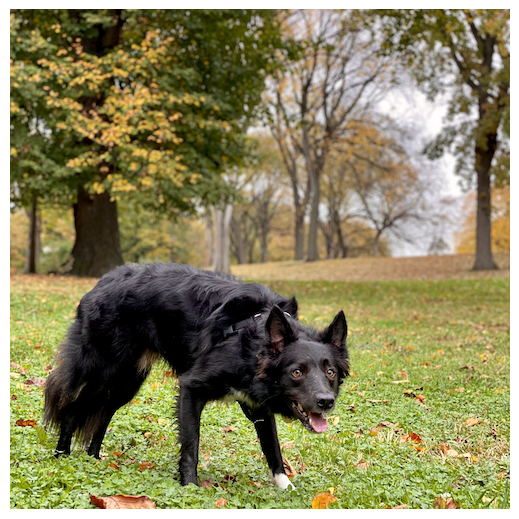

In [78]:
# if you made it thus far, here's a small thank you gift
sns.dogplot()